<a href="https://colab.research.google.com/github/jdeept/Financial-News/blob/main/Independent_On_Chain_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install web3 pandas matplotlib plotly requests


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.5/587.5 kB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.9/332.9 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.8/170.8 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 76.1 MB/s eta 0:00:00


In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from web3 import Web3


In [5]:
import requests

ETHERSCAN_API_KEY = "DC64SUVKZC5ES2DWMUR66V3Z2D8DY19ZDY"

url = f"https://api.etherscan.io/api?module=proxy&action=eth_blockNumber&apikey={ETHERSCAN_API_KEY}"
resp = requests.get(url).json()

latest_block = int(resp["result"], 16)
print("Latest Block:", latest_block)


Latest Block: 23216232


In [6]:
# Example: Get transactions from a block
url = f"https://api.etherscan.io/api?module=proxy&action=eth_getBlockByNumber&tag={hex(latest_block)}&boolean=true&apikey={ETHERSCAN_API_KEY}"
resp = requests.get(url).json()

txs = resp["result"]["transactions"]
df_api = pd.DataFrame(txs)[["hash", "from", "to", "value", "gas", "gasPrice"]]
df_api["value_eth"] = df_api["value"].apply(lambda x: int(x,16)/1e18)  # convert Wei → ETH
df_api["gasPrice_gwei"] = df_api["gasPrice"].apply(lambda x: int(x,16)/1e9)

print(df_api.head())


                                                hash  \
0  0x7ba637d1d8ed6ce56d15215438981a992313f9f5aba4...   
1  0x14833342385a3386c344995eb2db8e8bae5254d55926...   
2  0xfc1681c9b003b7697fa4628e94c58507e87b0b51d32b...   
3  0x16486b7affe5e2d5b9334144adb9631733efbb4120f5...   
4  0x4f7fd25fe396a8377e250a757b0938cc838afe217202...   

                                         from  \
0  0xbb1a1a2773a799d83078ae4d59d9f4b2b6ac50ff   
1  0xd89c31cebc4c153e4942dbbe939d25f1944bf20c   
2  0x1af85d572a8d1a6ef3a2cea3f0754f5085db7335   
3  0xae2fc483527b8ef99eb5d9b44875f005ba1fae13   
4  0x44f8c25f190da2fedda22a6a2b3b3cf91b548707   

                                           to value       gas     gasPrice  \
0  0x88481e2fbc98d4a251655b0f1a4422555ea72d9e   0x0  0x1069bd   0x625914fc   
1  0x80a64c6d7f12c47b7c66c5b4e20e72bc1fcd5d9e   0x0    0x80e8  0x80b28e168   
2  0x51c72848c68a965f66fa7a88855f9f7784502a7f   0x0   0x26032  0x133fdebbc   
3  0x1f2f10d1c40777ae1da742455c65828ff36df387  0x13  0x2

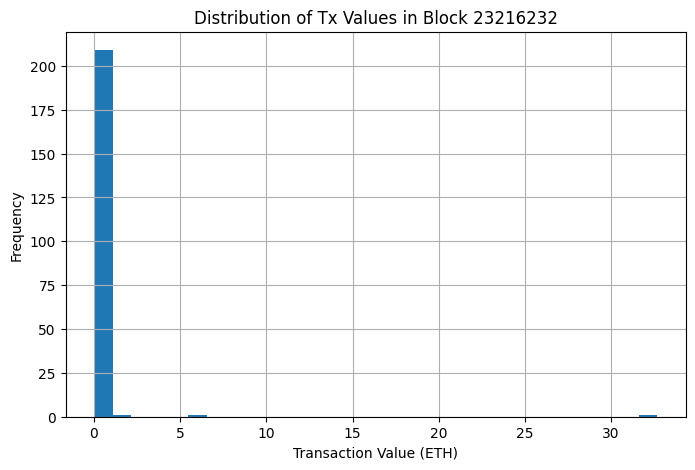

In [7]:
plt.figure(figsize=(8,5))
df_api["value_eth"].hist(bins=30)
plt.xlabel("Transaction Value (ETH)")
plt.ylabel("Frequency")
plt.title(f"Distribution of Tx Values in Block {latest_block}")
plt.show()


In [8]:
import time

def get_block_transactions(block_number):
    url = f"https://api.etherscan.io/api?module=proxy&action=eth_getBlockByNumber&tag={hex(block_number)}&boolean=true&apikey={ETHERSCAN_API_KEY}"
    resp = requests.get(url).json()
    return resp["result"]["transactions"]

block_range = 20  # last 20 blocks
tx_data = []

for b in range(latest_block - block_range, latest_block + 1):
    txs = get_block_transactions(b)
    for tx in txs:
        tx_data.append({
            "block": b,
            "from": tx["from"],
            "to": tx["to"],
            "value_eth": int(tx["value"],16)/1e18
        })
    time.sleep(0.2)  # avoid hitting API rate limit

df_multi = pd.DataFrame(tx_data)
print(df_multi.head())


      block                                        from  \
0  23216212  0xae2fc483527b8ef99eb5d9b44875f005ba1fae13   
1  23216212  0xcbfc65062256d0da0c3a05406972661332ab99dd   
2  23216212  0xae2fc483527b8ef99eb5d9b44875f005ba1fae13   
3  23216212  0xbee4b69f6821ee7196182788392ff188bac99011   
4  23216212  0xc8b8481fbe82585d0bd9f3ed60a92d472274c2e5   

                                           to     value_eth  
0  0x1f2f10d1c40777ae1da742455c65828ff36df387  3.500000e-17  
1  0x0000000000001ff3684f28c67538d4d072c22734  0.000000e+00  
2  0x1f2f10d1c40777ae1da742455c65828ff36df387  3.500000e-17  
3  0xbee3211ab312a8d065c4fef0247448e17a8da000  7.416986e-04  
4  0x881d40237659c251811cec9c364ef91dc08d300c  0.000000e+00  


In [9]:
active_addresses = df_multi["from"].nunique() + df_multi["to"].nunique()
print("Active Addresses:", active_addresses)


Active Addresses: 5056


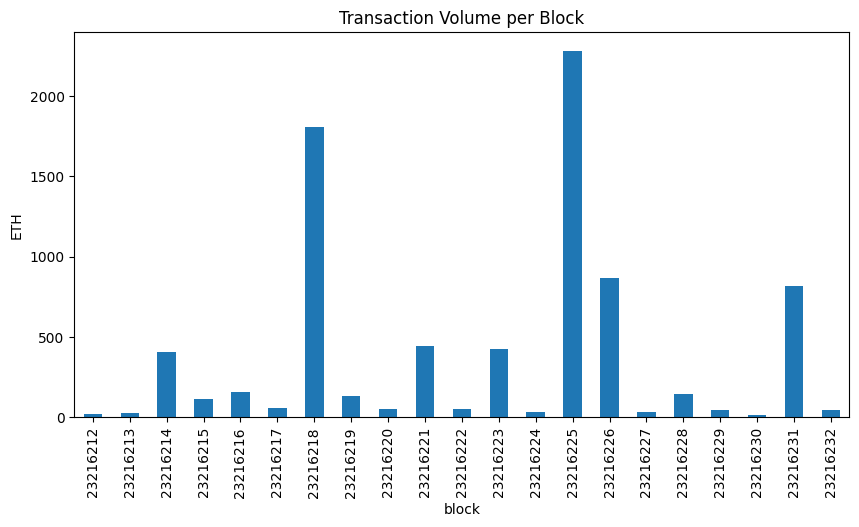

In [10]:
tx_volume = df_multi.groupby("block")["value_eth"].sum()
tx_volume.plot(kind="bar", figsize=(10,5))
plt.title("Transaction Volume per Block")
plt.ylabel("ETH")
plt.show()


In [11]:
whales = df_multi[df_multi["value_eth"] > 100]
print("Whale Transactions (>100 ETH):")
print(whales.head())


Whale Transactions (>100 ETH):
         block                                        from  \
362   23216214  0xec4a90159d9708f25e6bf95667fcbef055a13ec3   
1254  23216218  0x61c664b64bbeb0be45a280452c8ff48611d541da   
1991  23216221  0x56eddb7aa87536c09ccc2793473599fd21a8b17f   
2444  23216223  0x957763aa67de8bbbd3fa72e3fef6f9436797d9c7   
2761  23216225  0xa1abfa21f80ecf401bd41365adbb6fef6fefdf09   

                                              to   value_eth  
362   0x5d3366cc206ce7618035809b903adbb02fd1da94   185.40504  
1254  0xbd216513d74c8cf14cf4747e6aaa6420ff64ee9e  1769.96194  
1991  0x957763aa67de8bbbd3fa72e3fef6f9436797d9c7   399.99990  
2444  0xa6f7d73606d7a2eef49b918c1c139c65e3f37133   400.00000  
2761  0xeae7380dd4cef6fbd1144f49e4d1e6964258a4f4   300.99950  


TG bot implementation

In [1]:
!pip uninstall -y telegram telegram-bot python-telegram-bot


Found existing installation: python-telegram-bot 20.7
Uninstalling python-telegram-bot-20.7:
  Successfully uninstalled python-telegram-bot-20.7


In [1]:
!pip install python-telegram-bot==20.3 requests pandas matplotlib nest_asyncio

import nest_asyncio, asyncio
nest_asyncio.apply()


Token Addition

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from telegram import Update
from telegram.ext import Application, CommandHandler, ContextTypes

BOT_TOKEN = "8355666237:AAEib2Rss7ODOFyFmzB-mwtHsSlklxgSKPY"       # 👈 put your bot token
ETHERSCAN_API_KEY = "DC64SUVKZC5ES2DWMUR66V3Z2D8DY19ZDY"  # 👈 put etherscan API key


In [3]:
async def start(update: Update, context: ContextTypes.DEFAULT_TYPE):
    await update.message.reply_text("✅ On-Chain Bot is live! Use /plot to see latest block tx histogram.")

async def plot(update: Update, context: ContextTypes.DEFAULT_TYPE):
    try:
        # 1. Latest block
        url = f"https://api.etherscan.io/api?module=proxy&action=eth_blockNumber&apikey={ETHERSCAN_API_KEY}"
        resp = requests.get(url).json()
        latest_block = int(resp["result"], 16)

        # 2. Block txs
        url = f"https://api.etherscan.io/api?module=proxy&action=eth_getBlockByNumber&tag={hex(latest_block)}&boolean=true&apikey={ETHERSCAN_API_KEY}"
        resp = requests.get(url).json()
        txs = resp["result"]["transactions"]

        if not txs:
            await update.message.reply_text("⚠️ No transactions found in latest block.")
            return

        # 3. DataFrame
        df = pd.DataFrame(txs)[["hash","from","to","value","gas","gasPrice"]]
        df["value_eth"] = df["value"].apply(lambda x: int(x,16)/1e18)

        # 4. Plot histogram
        plt.figure(figsize=(8,5))
        df["value_eth"].hist(bins=30)
        plt.xlabel("Tx Value (ETH)")
        plt.ylabel("Frequency")
        plt.title(f"Tx Value Distribution in Block {latest_block}")
        plt.savefig("plot.png")
        plt.close()

        # 5. Send to Telegram
        await update.message.reply_photo(photo=open("plot.png","rb"))

    except Exception as e:
        await update.message.reply_text(f"❌ Error: {e}")


Handlers

In [ ]:
app = Application.builder().token(BOT_TOKEN).build()
app.add_handler(CommandHandler("start", start))
app.add_handler(CommandHandler("plot", plot))
app.add_handler(CommandHandler("active", active))


# Use asyncio run inside Colab
async def run():
    print("🤖 Bot is running... open Telegram and type /start or /plot")
    await app.run_polling()

await run()


🤖 Bot is running... open Telegram and type /start or /plot


In [5]:
async def active(update: Update, context: ContextTypes.DEFAULT_TYPE):
    try:
        # 1. Get latest block
        url = f"https://api.etherscan.io/api?module=proxy&action=eth_blockNumber&apikey={ETHERSCAN_API_KEY}"
        resp = requests.get(url).json()
        latest_block = int(resp["result"], 16)

        # 2. Loop last 50 blocks
        addresses = set()
        for i in range(latest_block-50, latest_block):
            url = f"https://api.etherscan.io/api?module=proxy&action=eth_getBlockByNumber&tag={hex(i)}&boolean=true&apikey={ETHERSCAN_API_KEY}"
            resp = requests.get(url).json()
            block = resp.get("result", {})
            txs = block.get("transactions", [])
            for tx in txs:
                addresses.add(tx["from"])
                if tx["to"]:
                    addresses.add(tx["to"])

        # 3. Reply with result
        await update.message.reply_text(
            f"📊 Active Addresses in last 50 blocks: {len(addresses)}"
        )

    except Exception as e:
        await update.message.reply_text(f"❌ Error in /active: {e}")


8355666237:AAEib2Rss7ODOFyFmzB-mwtHsSlklxgSKPY

DC64SUVKZC5ES2DWMUR66V3Z2D8DY19ZDY